In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


import torch
from numpy import genfromtxt
import numpy as np

def Th_comp_matmul(Ar, Ai, Br, Bi):  # Complex matmul pytorch function ########
    if Ar.ndim == 3 and Br.ndim == 3:
        a_th = torch.cat((torch.cat((Ar, -Ai), dim=2), torch.cat((Ai, Ar), dim=2)), dim=1)
        b_th = torch.cat((torch.cat((Br, -Bi), dim=2), torch.cat((Bi, Br), dim=2)), dim=1)
        c_th = torch.matmul(a_th, b_th)
        c_th_r = c_th[:, 0:int(c_th.shape[1] / 2), 0:int(c_th.shape[2] / 2)]
        c_th_i = c_th[:, int(c_th.shape[1] / 2):, 0:int(c_th.shape[2] / 2)]
    elif Ar.ndim == 2 and Br.ndim == 2:
        a_th = torch.cat((torch.cat((Ar, -Ai), dim=1), torch.cat((Ai, Ar), dim=1)), dim=0)
        b_th = torch.cat((torch.cat((Br, -Bi), dim=1), torch.cat((Bi, Br), dim=1)), dim=0)
        c_th = torch.matmul(a_th, b_th)
        c_th_r = c_th[0:int(c_th.shape[0] / 2), 0:int(c_th.shape[1] / 2)]
        c_th_i = c_th[int(c_th.shape[0] / 2):, 0:int(c_th.shape[1] / 2)]
    elif Ar.ndim == 4 and Br.ndim == 4:
        a_th = torch.cat((torch.cat((Ar, -Ai), dim=3), torch.cat((Ai, Ar), dim=3)), dim=2)
        b_th = torch.cat((torch.cat((Br, -Bi), dim=3), torch.cat((Bi, Br), dim=3)), dim=2)
        c_th = torch.matmul(a_th, b_th)
        c_th_r = c_th[:, :, 0:int(c_th.shape[2] / 2), 0:int(c_th.shape[3] / 2)]
        c_th_i = c_th[:, :, int(c_th.shape[2] / 2):, 0:int(c_th.shape[3] / 2)]
    elif Ar.ndim == 5 and Br.ndim == 5:
        a_th = torch.cat((torch.cat((Ar, -Ai), dim=4), torch.cat((Ai, Ar), dim=4)), dim=3)
        b_th = torch.cat((torch.cat((Br, -Bi), dim=4), torch.cat((Bi, Br), dim=4)), dim=3)
        c_th = torch.matmul(a_th, b_th)
        c_th_r = c_th[:, :, :, 0:int(c_th.shape[3] / 2), 0:int(c_th.shape[4] / 2)]
        c_th_i = c_th[:, :, :, int(c_th.shape[3] / 2):, 0:int(c_th.shape[4] / 2)]
    elif Ar.ndim * Br.ndim == 12:
        if Ar.ndim == 4:
            a_th = torch.cat((torch.cat((Ar, -Ai), dim=3), torch.cat((Ai, Ar), dim=3)), dim=2)
            b_th = torch.cat((torch.cat((Br, -Bi), dim=2), torch.cat((Bi, Br), dim=2)), dim=1)
          
            c_th = torch.matmul(a_th, b_th)
            c_th_r = c_th[:, :, 0:int(c_th.shape[2] / 2), 0:int(c_th.shape[3] / 2)]
            c_th_i = c_th[:, :, int(c_th.shape[2] / 2):, 0:int(c_th.shape[3] / 2)]
        elif Br.ndim == 4:
            a_th = torch.cat((torch.cat((Ar, -Ai), dim=2), torch.cat((Ai, Ar), dim=2)), dim=1)
            b_th = torch.cat((torch.cat((Br, -Bi), dim=3), torch.cat((Bi, Br), dim=3)), dim=2)
            c_th = torch.matmul(a_th, b_th)
            c_th_r = c_th[:, :, 0:int(c_th.shape[2] / 2), 0:int(c_th.shape[3] / 2)]
            c_th_i = c_th[:, :, int(c_th.shape[2] / 2):, 0:int(c_th.shape[3] / 2)]
    elif Ar.ndim * Br.ndim == 20:
        if Ar.ndim == 5:
            a_th = torch.cat((torch.cat((Ar, -Ai), dim=4), torch.cat((Ai, Ar), dim=4)), dim=3)
            b_th = torch.cat((torch.cat((Br, -Bi), dim=3), torch.cat((Bi, Br), dim=3)), dim=2)
            c_th = torch.matmul(a_th, b_th)
            c_th_r = c_th[:, :, :, 0:int(c_th.shape[3] / 2), 0:int(c_th.shape[4] / 2)]
            c_th_i = c_th[:, :, :, int(c_th.shape[3] / 2):, 0:int(c_th.shape[4] / 2)]
        elif Br.ndim == 5:
            a_th = torch.cat((torch.cat((Ar, -Ai), dim=3), torch.cat((Ai, Ar), dim=3)), dim=2)
            b_th = torch.cat((torch.cat((Br, -Bi), dim=4), torch.cat((Bi, Br), dim=4)), dim=3)
            c_th = torch.matmul(a_th, b_th)
            c_th_r = c_th[:, :, :, 0:int(c_th.shape[3] / 2), 0:int(c_th.shape[4] / 2)]
            c_th_i = c_th[:, :, :, int(c_th.shape[3] / 2):, 0:int(c_th.shape[4] / 2)]
    else:
        raise Exception('the dimension is not defined for Th_comp_matmul.')

    return c_th_r, c_th_i

def Th_inv(Ar, Ai):  # Complex inverse pytorch function ########
    Ar_inv = torch.inverse(Ar + torch.matmul(torch.matmul(Ai, torch.inverse(Ar)), Ai))
    Ai_inv = - torch.matmul(torch.matmul(torch.inverse(Ar), Ai), Ar_inv)
    return Ar_inv, Ai_inv

def Th_pinv(Ar, Ai):  # Complex inverse pytorch function ########
    if Ar.ndim == 2:
        if Ar.shape[0] < Ar.shape[1]:
            Tempr, Tempi = Th_comp_matmul(Ar, Ai, Ar.T, -Ai.T)
            Ar_inv, Ai_inv = Th_inv(Tempr, Tempi)
            return Th_comp_matmul(Ar.T, -Ai.T, Ar_inv, Ai_inv)
        elif Ar.shape[0] > Ar.shape[1]:
            Tempr, Tempi = Th_comp_matmul(Ar.T, -Ai.T, Ar, Ai)
            Ar_inv, Ai_inv = Th_inv(Tempr, Tempi)
            return Th_comp_matmul(Ar_inv, Ai_inv, Ar.T, -Ai.T)
        elif Ar.shape[0] == Ar.shape[1]:
            return Th_inv(Ar, Ai)
    elif Ar.ndim == 3:
        if Ar.shape[1] < Ar.shape[2]:
            Tempr, Tempi = Th_comp_matmul(Ar, Ai, Ar.permute(0, 2, 1), -Ai.permute(0, 2, 1))
            Ar_inv, Ai_inv = Th_inv(Tempr, Tempi)
            return Th_comp_matmul(Ar.permute(0, 2, 1), -Ai.permute(0, 2, 1), Ar_inv, Ai_inv)
        elif Ar.shape[1] > Ar.shape[2]:
            Tempr, Tempi = Th_comp_matmul(Ar.permute(0, 2, 1), -Ai.permute(0, 2, 1), Ar, Ai)
            Ar_inv, Ai_inv = Th_inv(Tempr, Tempi)
            return Th_comp_matmul(Ar_inv, Ai_inv, Ar.permute(0, 2, 1), -Ai.permute(0, 2, 1))
        elif Ar.shape[1] == Ar.shape[2]:
            return Th_inv(Ar, Ai)
    elif Ar.ndim == 4:
        if Ar.shape[2] < Ar.shape[3]:
            Tempr, Tempi = Th_comp_matmul(Ar, Ai, Ar.permute(0, 1, 3, 2), -Ai.permute(0, 1, 3, 2))
            Ar_inv, Ai_inv = Th_inv(Tempr, Tempi)
            return Th_comp_matmul(Ar.permute(0, 1, 3, 2), -Ai.permute(0, 1, 3, 2), Ar_inv, Ai_inv)
        elif Ar.shape[2] > Ar.shape[3]:
            Tempr, Tempi = Th_comp_matmul(Ar.permute(0, 1, 3, 2), -Ai.permute(0, 1, 3, 2), Ar, Ai)
            Ar_inv, Ai_inv = Th_inv(Tempr, Tempi)
            return Th_comp_matmul(Ar_inv, Ai_inv, Ar.permute(0, 1, 3, 2), -Ai.permute(0, 1, 3, 2))
        elif Ar.shape[2] == Ar.shape[3]:
            return Th_inv(Ar, Ai)
    else:
        raise Exception('5-D is not defined for Th_pinv.')

In [ ]:
from ssl import CHANNEL_BINDING_TYPES
import torch.utils.data as data
from termcolor import colored
import torch.nn.functional as F
import torch
from numpy import genfromtxt
import numpy as np
import re
import torch.nn as nn
import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import sparse
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import NMF
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import FastICA
# Database ####################################################################################################################
class Data_Reader(data.Dataset):
    def __init__(self, filename, Us, Mr, Nrf, K):

        print(colored('You select core dataset', 'cyan'))
        print(colored(filename, 'yellow'), 'is loading ... ')
        np_data = np.load(filename)
        transformer = IncrementalPCA(n_components=128, batch_size=500)



        #pca = PCA(n_components=128, svd_solver='full')
        #pca = PCA(n_components=1, svd_solver='arpack')
        
        RSSI_N1 = np_data[:, (Us * Mr) + (Us * K):(Us * Mr) + (2 * Us * K)].real.astype(float)
        #np_data2= pca.fit_transform(RSSI_N1)
        X_sparse = sparse.csr_matrix(RSSI_N1)
        np_data2 = transformer.fit_transform(X_sparse)
        #transformer = SparsePCA(n_components=128, random_state=0)
        #transformer = KernelPCA(n_components=128, kernel='linear')
        #np_data2 = transformer.fit_transform(RSSI_N1)
        #model = NMF(n_components=128, init='random', random_state=0)
        #np_data2 = model.fit_transform(RSSI_N1)
        #transformer = FactorAnalysis(n_components=128, random_state=0)
        #X_transformed = transformer.fit_transform(RSSI_N1)
        #transformer = FastICA(n_components=128,
                              #random_state=0,
                              #whiten='unit-variance')
        #np_data2 = transformer.fit_transform(RSSI_N1)
        #model = NMF(n_components=128, init='random', random_state=0)
        #np_data3 = model.fit_transform(model)       
        #transformer = KernelPCA(n_components=128, kernel='linear')
        #np_data3 = transformer.fit_transform(np_data2)
        #channelR = np_data[:, 0:Us * Mr].real.astype(float)
        #transformer2 = IncrementalPCA(n_components=256, batch_size=500)
        #X_sparse2 = sparse.csr_matrix(channelR)
        #np_data3 = transformer2.fit_transform(X_sparse2)

        self.channelR = np_data[:, 0:Us * Mr].real.astype(float)
        #channelI = np_data[:, 0:Us * Mr].imag.astype(float)
        #transformer3 = IncrementalPCA(n_components=256, batch_size=500)
        #X_sparse3 = sparse.csr_matrix(channelI)
        #np_data4 = transformer3.fit_transform(X_sparse3)
        self.channelI = np_data[:, 0:Us * Mr].imag.astype(float)

        self.alpha = np_data[:, Us * Mr: (Us * Mr) + (Us * K)].real.astype(float)

       # self.RSSI_N = np_data[:, (Us * Mr) + (Us * K):(Us * Mr) + (2 * Us * K)].real.astype(float)
        self.RSSI_N = np_data2
        self.UR = np_data[:, (Us * Mr) + (2 * Us * K):(2 * Us * Mr) + 
                          (2 * Us * K)].real.astype(float)
        self.UI = np_data[:, (Us * Mr) + (2 * Us * K):(2 * Us * Mr) + 
                          (2 * Us * K)].imag.astype(float)

        self.AR = np_data[:, Us * (2 * Mr + 2 * K):Us * (2 * Mr + 2 * K) + 
                          (Nrf * Mr)].real.astype(float)
        self.AI = np_data[:, Us * (2 * Mr + 2 * K):Us * (2 * Mr + 2 * K) + 
                          (Nrf * Mr)].imag.astype(float)

        self.target = np_data[:, Us * (2 * Mr + 2 * K) + (Nrf * Mr):Us * (2 * Mr + 2 * K) + 
                              (Nrf * Mr) + 1].real.astype(int)

        self.WR = np_data[:, Us * (2 * Mr + 2 * K) + (Nrf * Mr) + 1:Us * 
                          (2 * Mr + 2 * K + Nrf) + (Nrf * Mr) + 1].real.astype(float)
        self.WI = np_data[:, Us * (2 * Mr + 2 * K) + (Nrf * Mr) + 1:Us * 
                          (2 * Mr + 2 * K + Nrf) + (Nrf * Mr) + 1].imag.astype(float)

        self.deltaR = np_data[:, Us * (2 * Mr + 2 * K + Nrf) + (Nrf * Mr) + 1:Us * 
                              (2 * Mr + 3 * K + Nrf) + (Nrf * Mr) + 1].real.astype(float)
        self.deltaI = np_data[:, Us * (2 * Mr + 2 * K + Nrf) + (Nrf * Mr) + 1:Us * 
                              (2 * Mr + 3 * K + Nrf) + (Nrf * Mr) + 1].imag.astype(float)

        self.userp = np_data[:, Us * (2 * Mr + 3 * K + Nrf) + (Nrf * Mr) + 1: Us * 
                             (2 * Mr + 3 * K + Nrf + 2) + (Nrf * Mr) + 1].real.astype(float)

        self.n_samples = np_data.shape[0]

    def __len__(self):
        return self.n_samples

    def uniq_clas(self):
        uniq = np.unique(self.target, return_counts=True)
        NO_Class = np.unique(self.target).shape[0]
        print(colored("The number of Unique AP in I1: ", "green"), NO_Class)
        return np.max(uniq[1]) * 100 / uniq[1].sum()

    def __getitem__(self, index):
        return torch.Tensor(self.channelR[index]), torch.Tensor(self.channelI[index]), torch.Tensor(self.alpha[index]), \
            torch.Tensor(self.RSSI_N[index]), torch.Tensor(self.UR[index]), torch.Tensor(self.UI[index]), torch.Tensor(self.AR[index]), \
                torch.Tensor(self.AI[index]), torch.LongTensor(self.target[index]), torch.Tensor(self.WR[index]), torch.Tensor(self.WI[index]), \
                    torch.Tensor(self.deltaR[index]), torch.Tensor(self.deltaI[index]), torch.Tensor(self.userp[index])

# readme reader for HBF initial parameters ####################################################################################
def md_reader(DB_name):
    md = genfromtxt('DATASET.md', delimiter='\n', dtype='str')
    Us = int(re.findall(r'\d+', md[1])[0])
    Mr = int(re.findall(r'\d+', md[2])[0])
    Nrf = int(re.findall(r'\d+', md[3])[0])
    Ass_n = int(re.findall(r'\d+', md[4])[0])
    Noise_pwr = float(''.join(('1e-', str(int(int(re.findall(r'\d+', md[6])[0]) / 10)))))
    return Us, Mr, Nrf, Ass_n, Noise_pwr

class Initialization_Model_Params(object):
    def __init__(self,
                 DB_name,
                 Us,
                 Mr,
                 Nrf,
                 K,
                 K_limited,
                 Noise_pwr,
                 device,
                 device_ids
                 ):
        self.DB_name = DB_name
        self.Us = Us
        self.Mr = Mr
        self.Nrf = Nrf
        self.K = K
        self.K_limited = K_limited
        self.Noise_pwr = Noise_pwr
        self.device = device
        self.dev_id = device_ids

    def Data_Load(self):
        DataBase = Data_Reader(''.join(('DataBase_', self.DB_name, '.npy')),
                               self.Us, self.Mr, self.Nrf, self.K)
        uniq_dis_label = DataBase.uniq_clas()
        return DataBase, uniq_dis_label

    def Code_Read(self):
        codes = genfromtxt('/content/drive/MyDrive/HBF-Net-main/Codebook/Codebook_ij.csv', delimiter=',', dtype='complex', skip_header=0)
        label = np.arange(len(codes))
        self.n_output_clas = len(codes)
        print(colored("The length of the codebook: ", "green"), len(codes))
        Codes_idx = np.concatenate((label[:, np.newaxis], codes), axis=1)
        codeword_C = {}
        index_C = []
        for i in range(len(codes)):
            index_C = Codes_idx[i, 0].real.astype(int)
            icode_C = Codes_idx[i, 1:]
            codeword_C[index_C] = icode_C

        # torch tensor of codes
        codesr = torch.from_numpy(codes.real).type(torch.float)
        codesi = torch.from_numpy(codes.imag).type(torch.float)
        return codeword_C, len(codes), codesr, codesi

class Loss_FDP_Rate_Based(torch.nn.Module):
    def __init__(self, Us, Mr, Nrf, Noise_pwr):
        super(Loss_FDP_Rate_Based, self).__init__()
        self.Us = Us
        self.Mr = Mr
        self.Nrf = Nrf
        self.noise_power = Noise_pwr

    def rate_calculator(self, u_re, u_im, channelr, channeli):
        Wr, Wi = Th_comp_matmul(channelr, -channeli, u_re, u_im)
        W = Wr**2 + Wi**2
        diag_W = torch.diagonal(W, dim1=1, dim2=2)

        SINR = diag_W / (torch.sum(W, 2) - diag_W + self.noise_power)
        userRates = torch.log2(1 + SINR)
        sumRate = userRates.sum(1)

        return sumRate

    def forward(self, outr, outi, channelr, channeli):
        outr = outr.view(-1, self.Us, self.Mr).permute(0, 2, 1)
        outi = outi.view(-1, self.Us, self.Mr).permute(0, 2, 1)

        # power normalization over all antennas
        temp_pre = torch.sqrt(torch.sum(outr.flatten(1) ** 2 + outi.flatten(1) ** 2, dim=1))
        outr = (outr.flatten(1) / temp_pre.unsqueeze(1)).view(outr.shape)
        outi = (outi.flatten(1) / temp_pre.unsqueeze(1)).view(outi.shape)

        sum_rate = Loss_FDP_Rate_Based.rate_calculator(self, outr, outi, channelr, channeli)
        return -sum_rate.mean()

    def evaluate_rate(self, outr, outi, channelr, channeli):
        outr = outr.view(-1, self.Us, self.Mr).permute(0, 2, 1)
        outi = outi.view(-1, self.Us, self.Mr).permute(0, 2, 1)

        # power normalization over all antennas
        temp_pre = torch.sqrt(torch.sum(outr.flatten(1) ** 2 + outi.flatten(1) ** 2, dim=1))
        outr = (outr.flatten(1) / temp_pre.unsqueeze(1)).view(outr.shape)
        outi = (outi.flatten(1) / temp_pre.unsqueeze(1)).view(outi.shape)

        sum_rate = Loss_FDP_Rate_Based.rate_calculator(self, outr, outi, channelr, channeli)
        return sum_rate.mean()

class Loss_HBF_Rate_Based_4D(torch.nn.Module):
    def __init__(self, Us, Mr, Nrf, Noise_pwr):
        super(Loss_HBF_Rate_Based_4D, self).__init__()
        self.Us = Us
        self.Mr = Mr
        self.Nrf = Nrf
        self.noise_power = Noise_pwr

    def rate_calculator_4d(self, u_re, u_im, channelr, channeli):
        Wr, Wi = Th_comp_matmul(channelr, -channeli, u_re, u_im)
        W = Wr**2 + Wi**2
        diag_W = torch.diagonal(W, dim1=2, dim2=3)
        SINR = diag_W / (torch.sum(W, 3) - diag_W + self.noise_power)
        userRates = torch.log2(1 + SINR)
        sumRate = userRates.sum(2)
        return sumRate

    def forward(self, Wr, Wi, channelr, channeli, Ar, Ai):
        HBF_prer, HBF_prei = Th_comp_matmul(Ar.view(-1, len(channelr), self.Nrf, self.Mr).permute(0, 1, 3, 2),
                                            Ai.view(-1, len(channelr), self.Nrf, self.Mr).permute(0, 1, 3, 2), Wr, Wi)

        # power normalization over all antennas
        temp_pre = torch.sqrt(torch.sum(HBF_prer.flatten(2) ** 2 + HBF_prei.flatten(2) ** 2, dim=2))
        HBF_prer = (HBF_prer.flatten(2) / temp_pre.unsqueeze(2)).view(HBF_prer.shape)
        HBF_prei = (HBF_prei.flatten(2) / temp_pre.unsqueeze(2)).view(HBF_prei.shape)

        sum_rate = Loss_HBF_Rate_Based_4D.rate_calculator_4d(self, HBF_prer, HBF_prei, channelr, channeli)
        return sum_rate.T

    def evaluate_rate(self, Wr, Wi, channelr, channeli, Ar, Ai):
        HBF_prer, HBF_prei = Th_comp_matmul(Ar.view(-1, self.Nrf, self.Mr).permute(0, 2, 1),
            Ai.view(-1, self.Nrf, self.Mr).permute(0, 2, 1), Wr.permute(0, 2, 1), Wi.permute(0, 2, 1))

        # power normalization over all antennas
        temp_pre = torch.sqrt(torch.sum(HBF_prer.flatten(1) ** 2 + HBF_prei.flatten(1) ** 2, dim=1))
        HBF_prer = (HBF_prer.flatten(1) / temp_pre.unsqueeze(1)).view(HBF_prer.shape)
        HBF_prei = (HBF_prei.flatten(1) / temp_pre.unsqueeze(1)).view(HBF_prei.shape)

        sum_rate = Loss_FDP_Rate_Based.rate_calculator(self, HBF_prer, HBF_prei, channelr, channeli)

        return sum_rate.mean()

def FLP_loss(x, y):
    log_prob = - 1.0 * F.softmax(x, 1)
    temp = log_prob * y
    cel = temp.sum(dim=1)
    cel = cel.mean()
    return cel


In [ ]:
import torch.nn as nn
import torch

class Net_m_task_CNN(nn.Module):
    def __init__(self, n_in, n_hidden, n_out_Reg, n_out_clas, p_dropout, U, Ass, out_channel, kernel_s, padding):
        super(Net_m_task_CNN, self).__init__()

        #self.cnn1 = ComplexConv2D(4,4,in_channels=1, out_channels=16, stride=1, padding=padding)
        

        #self.cnn1 = (ComplexConv2D(4, 4, strides=1, padding='valid',
                          #kernel_initializer='complex_independent',name='Conv_P'))(encoded)
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=kernel_s, stride=1, padding=padding)
        self.relu1 = nn.LeakyReLU()
        self.bn1 = nn.BatchNorm2d(num_features=16)
        self.do1 = nn.Dropout2d(p_dropout)
        #self.do1 = nn.AlphaDropout(p_dropout)
        #self.do1 = nn.FeatureAlphaDropout(0.2)



        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=kernel_s, stride=1, padding=padding)
        self.relu2 = nn.LeakyReLU()
        self.bn2 = nn.BatchNorm2d(num_features=32)
        self.do2 = nn.Dropout2d(p_dropout)

        self.cnn3 = nn.Conv2d(in_channels=16, out_channels=8, kernel_size=kernel_s, stride=1, padding=padding)
        self.relu3 = nn.LeakyReLU()
        self.bn3 = nn.BatchNorm2d(num_features=8)
        self.do3 = nn.Dropout2d(p_dropout)

       
        
        #n_in1 = 8
        #self.word_embeddings = nn.Embedding.from_pretrained(0.5, freeze=True)

        self.lstm1 = nn.LSTM(1024, 512,
                            bidirectional=True, batch_first=True)
        self.do4 = nn.Dropout(0.2)
        
        self.rnn1 = nn.RNN(1024, 512,
                            bidirectional=True, batch_first=True)
        self.drnn1 = nn.Dropout(p_dropout)

        self.rnn2 = nn.RNN(512, 256,
                            bidirectional=True, batch_first=True)
        self.drnn2 = nn.Dropout(0.2)

        self.gru1 = nn.GRU(1024, 512,
                            bidirectional=True, batch_first=True)
        self.dgru1 = nn.Dropout(0.2)

        self.gru2 = nn.GRU(512, 256,
                            bidirectional=True, batch_first=True)
        self.dgru2 = nn.Dropout(0.2)

        self.lstm2 = nn.LSTM(512, 256,
                            bidirectional=True, batch_first=True)
        
        self.do5 = nn.Dropout(0.2)

        #self.lstm3 = nn.LSTM(32, n_in,
                            #bidirectional=True, batch_first=True)
        
        #self.do6 = nn.Dropout(p_dropout)
#end


        # Fully connected 1 (readout)
        x_new = (U + 2 * padding - kernel_s) + 1
        y_new = (Ass + 2 * padding - kernel_s) + 1

        nn_in_fc = 8 * (x_new + 2 * padding - kernel_s + 1) * (y_new + 2 * padding - kernel_s + 1)


        self.fc20 = nn.Linear(nn_in_fc, n_hidden)
        self.bn20 = nn.BatchNorm1d(n_hidden)
        self.relu20 = nn.LeakyReLU()
        self.do20 = nn.Dropout(p_dropout)

        self.fc30 = nn.Linear(n_hidden, n_hidden)
        self.bn30 = nn.BatchNorm1d(n_hidden)
        self.relu30 = nn.LeakyReLU()
        self.do30 = nn.Dropout(p_dropout)

        # Linear function (readout)
        self.fc7R = nn.Linear(n_hidden, n_out_Reg)

        # Linear function (readout)
        self.fc8R = nn.Linear(n_hidden, n_out_Reg)

        # Linear function (readout)
        self.fc9C = nn.Linear(n_hidden, n_out_clas)

    def forward(self, x):  # always

        out = self.cnn1(x)
        out = self.do1(out)
        out = self.bn1(out)
        out = self.relu1(out)

        #out = self.cnn2(out)
        #out = self.do2(out)
        #out = self.bn2(out)
        #out = self.relu2(out)

        out = self.cnn3(out)
        out = self.do3(out)
        out = self.bn3(out)
        out = self.relu3(out)

        #m6
        #out= torch.flatten(out)
        #out= out[0:131072]
        out = out.view(-1,1024)
        #out = out.view(-1,64)
        #out = self.lstm1(out)
        #out = self.do4(out[0])

        out = self.rnn1(out)
        out = self.drnn1(out[0])
       # out = out.view(-1,512)
        #out = self.rnn2(out)
        #out = self.drnn2(out[0])        

        #out = torch.flatten(out)
        #out = out.view(-1,512)
        #out = self.lstm2(out)
        #out = self.do5(out[0])  

        #out = self.lstm3(out)
        #out = self.do6(out)     
        #out = torch.flatten(out)
        #out = out.view(-1,1024)
        out = out.view(out.size(0), -1)

        out = self.fc20(out)
        out = self.do20(out)
        out = self.relu20(out)
        out = self.bn20(out)

        out = self.fc30(out)
        out = self.do30(out)
        out = self.relu30(out)
        out = self.bn30(out)
        #out= torch.flatten(out)
        #out= out[1:131073]
        #out = out.view(-1, 1024)
        #out = self.lstm1(out)
        #out = self.do4(out[0])
        # Linear function (readout)  ****** LINEAR ******
        outR1 = self.fc7R(out)

        # Linear function (readout)  ****** LINEAR ******
        #outR2 = self.fc8R(out)
        outR2 = self.fc8R(out)
        # Linear function (readout)  ****** LINEAR ******
        outC = self.fc9C(out)

        return outR1, outR2,outC

In [ ]:
from sklearn.base import RegressorMixin

import torch.nn as nn
import torch
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import SparsePCA
from scipy import sparse
from sklearn.decomposition import IncrementalPCA



class Networks_activations(object):
    def __init__(self,
                 Us,
                 Mr,
                 Nrf,
                 K,
                 K_limited,
                 Noise_pwr,
                 device,
                 device_ids,
                 n_input,
                 n_hidden,
                 n_output_reg,
                 n_output_clas,
                 p_dropout,
                 out_channel,
                 kernel_s,
                 padding
                 ):
        self.Us = Us
        self.Mr = Mr
        self.Nrf = Nrf
        self.K = K
        self.K_limited = K_limited
        self.Noise_pwr = Noise_pwr
        self.device = device
        self.dev_id = device_ids
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output_reg = n_output_reg
        self.n_output_clas = n_output_clas
        self.p_dropout = p_dropout
        self.out_channel = out_channel
        self.kernel_s = kernel_s
        self.padding = padding
        
    def Network_m_Task(self):
        if self.device.type == 'cuda':
            return nn.DataParallel(Net_m_task_CNN(self.n_input, self.n_hidden, self.n_output_reg, self.n_output_clas, self.p_dropout, self.Us, self.K_limited, self.out_channel, self.kernel_s, self.padding), device_ids=self.dev_id).to(self.device)
        else:
            return Net_m_task_CNN(self.n_input, self.n_hidden, self.n_output_reg, self.n_output_clas,
                self.p_dropout, self.Us, self.K_limited, self.out_channel, self.kernel_s, self.padding)

    def Inp_MT(self, RSSI):
        #transformer = IncrementalPCA(n_components=12, batch_size=10080)
        #in12 = torch.flatten(RSSI)
        #Inputs_MT = RSSI.reshape(len(RSSI), 1, self.Us, self.K)[:, :, :, 0:self.K_limited].float().to(self.device)  
        #Inputs_MT1 = RSSI.reshape(len(RSSI), 1, self.Us, self.K)[:, :, :, 0:self.K_limited].float().to(self.device)
       # Inputs_MT2 = np.array(RSSI)
        #X_sparse = sparse.csr_matrix(Inputs_MT2)

        #Inputs_MT = transformer.fit_transform(X_sparse)
       # RSSI =torch.Tensor(Inputs_MT)
        #RSSI2 = torch.flatten(RSSI1)
        #RSSI= RSSI2[:5000]
        #Inputs_MT = RSSI.reshape(len(RSSI), 1, self.Us, self.K)[:, :, :, 0:self.K_limited].float().to(self.device)        
        Inputs_MT = RSSI.reshape(len(RSSI), 1, self.Us, self.K)[:, :, :, 0:self.K_limited].float().to(self.device)
        return Inputs_MT

In [ ]:
import gc
import pandas as pd


gc.collect()
df=pd.DataFrame()
del(df)
from tensorflow.keras import backend as K
K.clear_session()


In [ ]:

import numpy as np
import os
import csv
import torch.nn as nn
import torch.nn.functional as F
import math
from numpy import genfromtxt
import torch as th

from termcolor import colored
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import SparsePCA
from scipy import sparse
from sklearn.decomposition import IncrementalPCA
###############################################################################
# Directory file
###############################################################################
DB_name = 'dataSet64x8x4_130dB_0129201820'
###############################################################################
# Processor selection GPU if available (using GPU is highly recommended)
###############################################################################
device = th.device("cuda:2" if th.cuda.is_available() else "cpu")
device_ids = [2, 1, 3]
print("Is Cuda available? ", colored('True', 'green')
    if th.cuda.is_available() else colored('False', 'red'))
print("Which devide?", colored(device, 'cyan'))

#if torch.cuda.is_available():
    #device= torch.device("cuda")
#else:
    #device = torch.device('cpu')
#print("Using {}.".format(device))

###############################################################################
# Setup Parameters
###############################################################################

# Beamforming approach  AFP_Net, HBF_NET   ####################################
#BF_approach = 'HBF_Net'
BF_approach = 'HCR'
###############################################################################
# Beamfroming system model and DNN Parameters
###############################################################################
os.chdir(os.path.dirname(os.path.abspath('/content/drive/MyDrive/HBF-Net-main/dataSet64x8x4_130dB_0129201820.npy')))
Us, Mr, Nrf, K, Noise_pwr = md_reader(DB_name)                # Number of users, antenna, K, RF chains and noise power
K_limited = K                                                 # Number of SS as RSSI
batch_size = 500                                          # Batch size
epoch_size = 100                                         # Number of training epoches
lr = 0.001                                                # Learning rate
wd = 1e-9                                                      # Weight decay
n_input = Us * K_limited                                      # Input dimensions
n_hidden = 1024                                         # Size of FCL layers
out_channel = 16                                              # Size of CL channels
kernel_s = 3                                                  # Size of Kernels in CL
padding = 1                                                   # Size of padding in CL
p_dropout = 0.05                                              # Probability of dropout




if BF_approach == 'HCR':
    n_output_reg = Us * Mr
else:
    raise Exception('BF_approach value is wrong !!')

###############################################################################
# Main Menu of configuration
###############################################################################
#my line

#end my line

Main_Menu = Initialization_Model_Params(DB_name,
                                        Us,
                                        Mr,
                                        Nrf,
                                        K,
                                        K_limited,
                                        Noise_pwr,
                                        device,
                                        device_ids)

###############################################################################
# Reading Database
###############################################################################
DataBase, uniq_dis_label = Main_Menu.Data_Load()

###############################################################################
# Codeword dictionary
###############################################################################
#codeword_C, n_output_clas, codesr, codesi = Main_Menu.Code_Read()
codeword_C, n_output_clas, codesr, codesi = Main_Menu.Code_Read()
###############################################################################
# Training-set and test-set generation
###############################################################################
train_size = int(0.85 * len(DataBase))
test_size = len(DataBase) - train_size
train_dataset, test_dataset = th.utils.data.random_split(DataBase, [train_size, test_size])

print(colored('The size of training set is ', 'yellow'), len(train_dataset))
print(colored('The size of Test set is ', 'yellow'), len(test_dataset))

###############################################################################
# Dataloaders
###############################################################################
my_dataloader = th.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
my_testloader = th.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

###############################################################################
# DNN architecture parameters
###############################################################################
Networks_Main_Menu = Networks_activations(Us,
                                        Mr,
                                        Nrf,
                                        K,
                                        K_limited,
                                        Noise_pwr,
                                        device,
                                        device_ids,
                                        n_input,
                                        n_hidden,
                                        n_output_reg,
                                        n_output_clas,
                                        p_dropout,
                                        out_channel,
                                        kernel_s,
                                        padding)

Model_m_task = Networks_Main_Menu.Network_m_Task()

###############################################################################
# DNN OPTIMIZER
###############################################################################
optimizer_m_task = th.optim.Adam(Model_m_task.parameters(), lr=lr, weight_decay=wd)

###############################################################################
# scheduler lr
###############################################################################
scheduler_MT = ReduceLROnPlateau(optimizer_m_task, mode='max', factor=0.1, patience=5, verbose=True)

###############################################################################
# Main training loop
###############################################################################
if BF_approach == 'HCR':
    # initialing the loss function
    criterium_clas_4d = Loss_HBF_Rate_Based_4D(Us, Mr, Nrf, Noise_pwr).to(device)
    loss_clas1=[]
    RATE_Predicted_HBF1= [] 
    RATE_Optimum_HBF1= []


    for i in range(1, epoch_size):   # Main traning loop
        for k, (channelR, channelI, alpha, RSSI, UR, UI, AR, AI, index, WR, WI, deltaR, deltaI, userp) in enumerate(my_dataloader):  # Loading data from data loader
            
            # Input data dimension check (CNN)
            
            Inputs_MT = Networks_Main_Menu.Inp_MT(RSSI)

            # Loading the CSI (real and imaginary)
            channelR = channelR.view(-1, Us, Mr).to(device)
            channelI = channelI.view(-1, Us, Mr).to(device)

            # Set gradient to 0.
            optimizer_m_task.zero_grad()

            # Feed forward multi-tasking DNN
            Model_m_task.train()
            out1_reg, out2_reg, out_clas = Model_m_task(Inputs_MT)

            # computing the loss fucntion for HBF using eq(20)
            xx_pr, xx_pi = Th_pinv(th.unsqueeze(codesr.unsqueeze(1), 2).repeat(1, len(RSSI), 1, 1).view(-1, len(RSSI), Nrf, Mr).to(device),
                th.unsqueeze(codesi.unsqueeze(1), 2).repeat(1, len(RSSI), 1, 1).view(-1, len(RSSI), Nrf, Mr).to(device))
            w_outr, w_outi = Th_comp_matmul(out1_reg.view(-1, Us, Mr), out2_reg.view(-1, Us, Mr), xx_pr, xx_pi)

            HBF_all_4d = criterium_clas_4d(w_outr.permute(0, 1, 3, 2), w_outi.permute(0, 1, 3, 2), channelR, channelI,
                th.unsqueeze(codesr.unsqueeze(1), 2).repeat(1, len(RSSI), 1, 1).to(device), th.unsqueeze(codesi.unsqueeze(1), 2).repeat(1, len(RSSI), 1, 1).to(device))

            loss_clas = FLP_loss(out_clas, HBF_all_4d)
            loss = nn.CrossEntropyLoss()
            #loss_clas = -loss(out_clas, HBF_all_4d)

            # Gradient calculation.
            loss_clas.backward(retain_graph=True)

            loss_clas1.append(loss_clas)
            # Model weight modification based on the optimizer.
            optimizer_m_task.step()
            

            # iterate through test dataset
            if k == 0 or i % epoch_size == 0:
                del loss
                # No gardient in test mode
                with th.no_grad():
                    R_predicted_HBF = []
                    R_optimum_HBF = []
                    R_optimum_FDP = []
                    R_predicted_FDP = []
                    Rate_Ratio_HBF = []
                    Rate_Ratio_FDP = []
                    w_prer= []
                    w_prei= []               
                    An_Predr= []  
                    An_Predi   = [] 
                    T_channelR= [] 
                    T_channelI= [] 

                    for (tchannelR, tchannelI, talpha, tRSSI, tUR, tUI, tAR, tAI, tindex, tWR, tWI, tdeltaR, tdeltaI, tup) in my_testloader:

                        # Input data dimension check (CNN)
                        testInputs_Reg = Networks_Main_Menu.Inp_MT(tRSSI)

                        # Loading the near-optimal digital precoder, CSI (real and imaginary)
                        T_wR = tWR.reshape(-1, Us, Nrf).to(device)
                        T_wI = tWI.reshape(-1, Us, Nrf).to(device)
                        T_channelR = tchannelR.reshape(-1, Us, Mr).to(device)
                        T_channelI = tchannelI.reshape(-1, Us, Mr).to(device)

                        # Forward pass test mode DNN
                        Model_m_task.eval()
                        pred1_reg, pred2_reg, pred_class = Model_m_task(testInputs_Reg)

                        # find the maximum probability as predication of classification
                        _, predicted = th.max(F.softmax(pred_class, 1), 1)

                        # mapping in the codebook to find the corresponding analog precoder
                        An_Predr = codesr[predicted, :].to(device)
                        An_Predi = codesi[predicted, :].to(device)

                        # finding digital precoder 
                        x_pr, x_pi = Th_pinv(An_Predr.view(-1, Nrf, Mr), An_Predi.view(-1, Nrf, Mr))
                        w_prer, w_prei = Th_comp_matmul(pred1_reg.view(-1, Us, Mr), pred2_reg.view(-1, Us, Mr), x_pr, x_pi)

                        # rate calculation
                        # DNN HBF
                        R_predicted_HBF.append(criterium_clas_4d.evaluate_rate(w_prer, w_prei, T_channelR, T_channelI, An_Predr, An_Predi))
                        # near-optimal HBF
                        R_optimum_HBF.append(criterium_clas_4d.evaluate_rate(T_wR, T_wI, T_channelR, T_channelI, tAR.to(device), tAI.to(device)))
                        


                # Average over all mini-batches
                RATE_Predicted_HBF = sum(R_predicted_HBF) / len(R_predicted_HBF)

                RATE_Optimum_HBF = sum(R_optimum_HBF) / len(R_optimum_HBF)

                RATE_Ratie_HBF = 100 * RATE_Predicted_HBF / RATE_Optimum_HBF

                RATE_Predicted_HBF1.append(RATE_Predicted_HBF)
                RATE_Optimum_HBF1.append(RATE_Optimum_HBF)
                scheduler_MT.step(RATE_Predicted_HBF)
                print('Iter:==>{:3d} Loss_Class:{:.3f} Rate_opt_HBF:{:.2f}  Rate_pre_HBF:{:.2f}  Ratio_HBF:{:.2f}% '.
                    format(i,  loss_clas, RATE_Optimum_HBF, RATE_Predicted_HBF,  RATE_Ratie_HBF))
                #gc.collect()
else:
    raise Exception('BF_approach is wrong !!')


Is Cuda available?  False
Which devide? cpu
You select core dataset
DataBase_dataSet64x8x4_130dB_0129201820.npy is loading ... 
The number of Unique AP in I1:  5
The length of the codebook:  5
The size of training set is  8568
The size of Test set is  1512
Iter:==>  1 Loss_Class:-1.007 Rate_opt_HBF:5.32  Rate_pre_HBF:1.35  Ratio_HBF:25.31% 
Iter:==>  2 Loss_Class:-3.920 Rate_opt_HBF:5.32  Rate_pre_HBF:3.45  Ratio_HBF:64.78% 
Iter:==>  3 Loss_Class:-4.300 Rate_opt_HBF:5.32  Rate_pre_HBF:4.15  Ratio_HBF:77.98% 
Iter:==>  4 Loss_Class:-4.301 Rate_opt_HBF:5.32  Rate_pre_HBF:4.56  Ratio_HBF:85.69% 
Iter:==>  5 Loss_Class:-4.311 Rate_opt_HBF:5.32  Rate_pre_HBF:4.46  Ratio_HBF:83.72% 


KeyboardInterrupt: ignored

In [ ]:
channelR, channelI, alpha, RSSI, UR, UI, AR, AI, index, WR, WI, deltaR, deltaI, userp

NameError: ignored

In [ ]:
print(len(channelR))

500


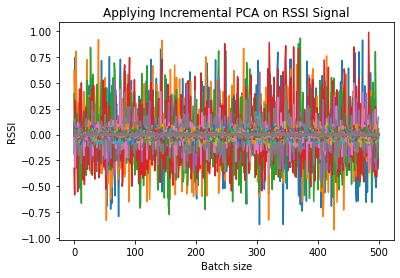

In [ ]:
x5 =RSSI
#x1 =array_rain_fall_npy
#y = nor2_rop
a=x5.detach().numpy()
#b=y.detach().numpy() 
#z=predicted[:20]
#y_score = z.detach().numpy()
#print(max(x5))
#print(y)
#nn_fpr, nn_tpr, nn_thresholds = roc_curve(a, y_score)
import torch
import matplotlib.pyplot as plt
with torch.no_grad():
  plt.plot(a)
  plt.title('Applying Incremental PCA on RSSI Signal')
  plt.xlabel('Batch size')
  plt.ylabel('RSSI')
  #plt.legend(['K=4', 'K=8','K=16','K=32'], loc='center right')
  #plt.savefig("/content/drive/MyDrive/HBF-Net-main/Figure/ipcaRSSI.png",  dpi=400)
  plt.show()